<a href="https://colab.research.google.com/github/SullyC25/Week4/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
import os
project_path = '/content/drive/MyDrive/Preprocessing'
os.chdir(project_path)
print("Working directory set to:", os.getcwd())


✅ Working directory set to: /content/drive/MyDrive/Preprocessing


In [ ]:
!pip install xarray netCDF4 matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.6 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the NetCDF file
filename = "cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_1754050477350.nc"
ds = xr.open_dataset(filename)

# Show the dataset structure
ds


<xarray.Dataset> Size: 14MB
Dimensions:    (time: 184, latitude: 48, longitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2024-07-01 2024-07-02 ... 2024-12-31
  * latitude   (latitude) float32 192B 20.06 20.19 20.31 ... 25.69 25.81 25.94
  * longitude  (longitude) float32 160B 88.06 88.19 88.31 ... 92.69 92.81 92.94
Data variables:
    adt        (time, latitude, longitude) float32 1MB ...
    err_sla    (time, latitude, longitude) float32 1MB ...
    err_ugosa  (time, latitude, longitude) float32 1MB ...
    err_vgosa  (time, latitude, longitude) float32 1MB ...
    flag_ice   (time, latitude, longitude) float32 1MB ...
    sla        (time, latitude, longitude) float32 1MB ...
    ugos       (time, latitude, longitude) float32 1MB ...
    ugosa      (time, latitude, longitude) float32 1MB ...
    vgos       (time, latitude, longitude) float32 1MB ...
    vgosa      (time, latitude, longitude) float32 1MB ...
Attributes:
    Conventions:       CF-1.11
    title:             NRT merged all satellites Global Ocean Gridded SSALTO/...
    institution:       CLS, CNES
    source:            Altimetry measurements
    history:           2025-04-17 20:03:53Z: Creation
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    comment:           Sea Surface Height measured by Altimetry and derived v...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SEALEVEL_GLO_PHY_L4_NRT_008_046
    subset:datasetId:  cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_...
    subset:date:       2025-08-01T12:14:37.351Z

In [ ]:
# Define your region of interest
lat_min, lat_max = 20.0, 26.0
lon_min, lon_max = 88.0, 93.0

# Subset using correct coordinate names
subset = ds.sel(latitude=slice(lat_min, lat_max),
                longitude=slice(lon_min, lon_max))


# Print confirmation
print(f" Subset shape: {subset['sla'].shape}")


NameError: name 'ds' is not defined

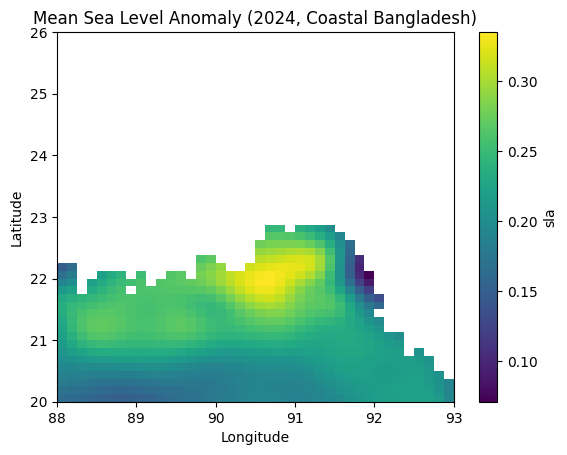

In [ ]:
# Plot mean SLA over time for the region
subset['sla'].mean(dim='time').plot(cmap='viridis')
plt.title("Mean Sea Level Anomaly (2024, Coastal Bangladesh)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




In [ ]:
# Save to a new NetCDF file for later use
subset.to_netcdf("processed_sla_2024_bangladesh.nc")
print("✅ Saved cleaned file: processed_sla_2025_bangladesh.nc")


✅ Saved cleaned file: processed_sla_2025_bangladesh.nc
